In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [9]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [10]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [11]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [12]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30


In [14]:
label_df=df['v1'].value_counts().index

In [15]:
value_df=df['v1'].value_counts().values

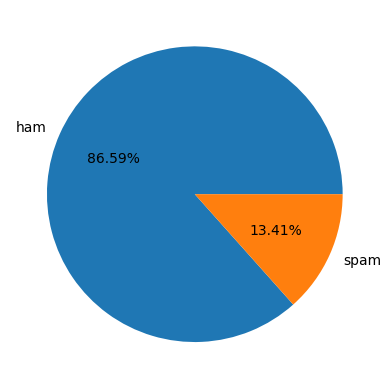

In [16]:
plt.pie(x=value_df,labels=label_df,autopct='%1.2f%%')
plt.show()

<Axes: xlabel='count', ylabel='v1'>

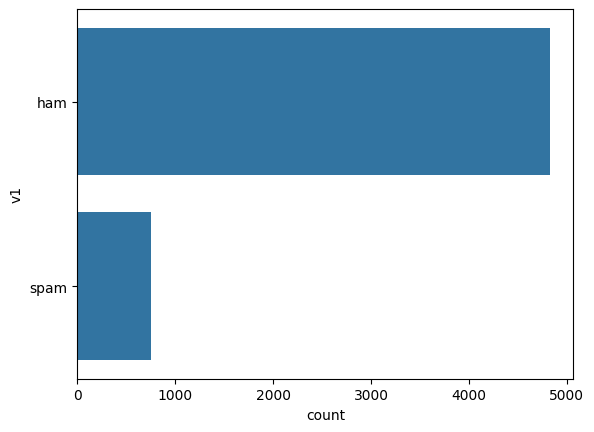

In [17]:
sns.countplot(df['v1'])

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vectorizer = CountVectorizer()

In [24]:
X = vectorizer.fit_transform(df['v2'])

In [25]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 73916 stored elements and shape (5572, 8672)>

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
sm = SMOTE(random_state=42)

In [29]:
y=df['v1']

In [30]:
X_res, y_res = sm.fit_resample(X, y)

In [31]:
X_res

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 180791 stored elements and shape (9650, 8672)>

In [32]:
y_res

,v1
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
9645,spam
9646,spam
9647,spam
9648,spam


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
y_res=le.fit_transform(y_res)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.33, random_state=42)

In [39]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [40]:
y_test=le.fit_transform(y_test)

In [41]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test,clf.predict(X_test))

0.9714285714285714

In [44]:
y_pred=clf.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred)

0.9714285714285714

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

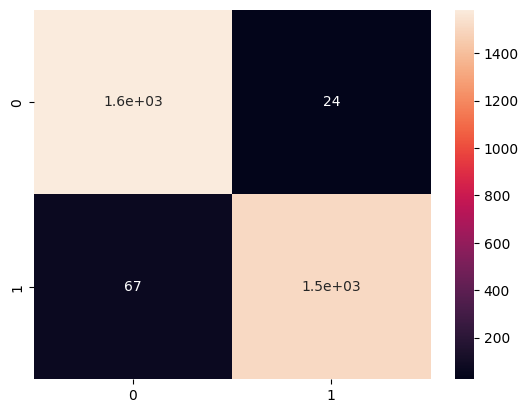

In [50]:
sns.heatmap(cm,annot=True)

In [46]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1608
           1       0.98      0.96      0.97      1577

    accuracy                           0.97      3185
   macro avg       0.97      0.97      0.97      3185
weighted avg       0.97      0.97      0.97      3185



In [53]:
from sklearn.metrics import roc_curve

In [54]:
roc_curve(y_test,y_pred)

(array([0.        , 0.01492537, 1.        ]),
 array([0.        , 0.95751427, 1.        ]),
 array([inf,  1.,  0.]))